## Using first feature only

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Saikat\1st python project from anaconda\Housepriceprediction.csv",index_col=0)

In [3]:
data

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,
1,8450,7,856,1710,8,2,548,208500
2,9600,6,1262,1262,6,2,460,181500
3,11250,7,920,1786,6,2,608,223500
4,9550,7,961,1717,7,3,642,140000
5,14260,8,1145,2198,9,3,836,250000
...,...,...,...,...,...,...,...,...
1456,7917,6,953,1647,7,2,460,175000
1457,13175,6,2073,2073,7,2,500,210000
1458,9042,7,1188,2340,9,1,252,266500


In [4]:
data.corr()

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
LotArea,1.000000,0.105806,0.299475,0.263116,0.190015,0.154871,0.180403,0.263843
OverallQual,0.105806,1.000000,0.476224,0.593007,0.427452,0.600671,0.562022,0.790982
1stFlrSF,0.299475,0.476224,1.000000,0.566024,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.263116,0.593007,0.566024,1.000000,0.825489,0.467247,0.468997,0.708624
TotRmsAbvGrd,0.190015,0.427452,0.409516,0.825489,1.000000,0.362289,0.337822,0.533723
GarageCars,0.154871,0.600671,0.439317,0.467247,0.362289,1.000000,0.882475,0.640409
GarageArea,0.180403,0.562022,0.489782,0.468997,0.337822,0.882475,1.000000,0.623431
SalePrice,0.263843,0.790982,0.605852,0.708624,0.533723,0.640409,0.623431,1.000000


## Using first feature, polynomial regression degree 2

In [5]:
df=pd.DataFrame()
df['LotArea'],df['SalePrice']=data['LotArea'],data['SalePrice']
df

,LotArea,SalePrice
Id,,
1,8450,208500
2,9600,181500
3,11250,223500
4,9550,140000
5,14260,250000
...,...,...
1456,7917,175000
1457,13175,210000
1458,9042,266500


In [6]:
df.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['LotArea'],df['SalePrice'],train_size=1000)
x_train_df,x_test_df=pd.DataFrame(x_train),pd.DataFrame(x_test)
x_train_df

,LotArea
Id,
1270,11344
870,9938
252,4750
877,25286
396,9571
...,...
818,13265
376,10020
105,7758


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly,x_test_poly=poly.fit_transform(x_train_df),poly.fit_transform(x_test_df)
x_train_poly

array([[1.00000000e+00, 1.13440000e+04, 1.28686336e+08],
       [1.00000000e+00, 9.93800000e+03, 9.87638440e+07],
       [1.00000000e+00, 4.75000000e+03, 2.25625000e+07],
       ...,
       [1.00000000e+00, 7.75800000e+03, 6.01865640e+07],
       [1.00000000e+00, 9.37500000e+03, 8.78906250e+07],
       [1.00000000e+00, 2.32570000e+04, 5.40888049e+08]])

In [9]:
x_train_df

,LotArea
Id,
1270,11344
870,9938
252,4750
877,25286
396,9571
...,...
818,13265
376,10020
105,7758


In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [11]:
reg.fit(x_train_poly,y_train)
coefficient=reg.coef_
intercept=reg.intercept_

In [12]:
print(coefficient,intercept)

[ 0.00000000e+00  5.99307124e+00 -3.43602453e-05] 123476.22577809679


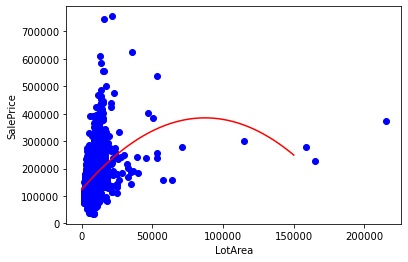

In [13]:
x_axis=np.arange(0,150000,0.5)
response=intercept + coefficient[1]*x_axis+coefficient[2]*x_axis**2

plt.scatter(df['LotArea'],df['SalePrice'],color='b')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.plot(x_axis,response,color='r')
plt.show()

In [14]:
y_pred=reg.predict(x_test_poly)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)      # feature is not correlated with target so giving less r2_score

0.09201666192418545

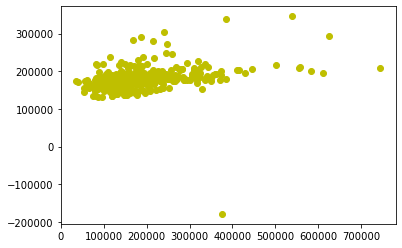

In [16]:
plt.scatter(y_test,y_pred,color='y')
plt.show()

## Using first feature, polynomial regression of degree3

In [17]:
poly3=PolynomialFeatures(3)
x_train_poly3,x_test_poly3=poly3.fit_transform(x_train_df),poly3.fit_transform(x_test_df)

In [18]:
reg2=LinearRegression()
reg2.fit(x_train_poly3,y_train)
coef_3=reg2.coef_
intercept_3=reg.intercept_

In [19]:
print(coef_3,intercept_3)

[ 0.00000000e+00  1.00917653e+01 -1.56444947e-04  6.22648204e-10] 123476.22577809679


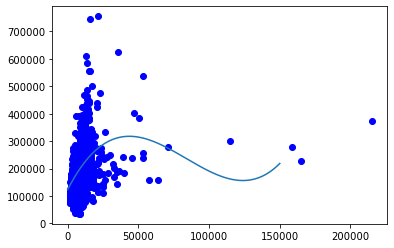

In [20]:
response3=intercept+coef_3[1]*x_axis+coef_3[2]*x_axis**2+coef_3[3]*x_axis**3
plt.scatter(df['LotArea'],df['SalePrice'],color='b')
plt.plot(x_axis,response3)
plt.show()

In [21]:
y_pred3=reg2.predict(x_test_poly3)

In [22]:
r2_score(y_test,y_pred3)

-0.011380693083716142

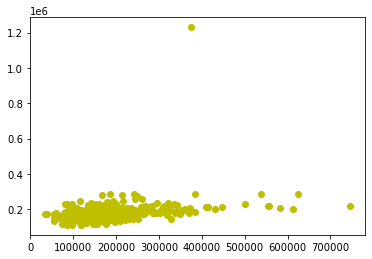

In [23]:
plt.scatter(y_test,y_pred3,color='y')
plt.show()